#                     DRAGON REAL ESTATES

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("final_data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288441,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703803,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

# Train Test plitting

In [8]:
# for learning purpose
import numpy as np
def splitting_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
# train_set, test_set = splitting_train_test(housing,0.2)

In [10]:
# print(len(train_set),len(test_set))

In [11]:
from sklearn.model_selection import train_test_split      # using model from sklearn 
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state= 42)
print(len(train_set),len(test_set))

404 102


# creating a Statified shuffled split

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set['CHAS'].value_counts() 

CHAS
0    376
1     28
Name: count, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
376/28 

13.428571428571429

In [16]:
95/7

13.571428571428571

## in oriaginal projet remember that you can directly do  this:

In [17]:
housing = strat_train_set.copy()

In [18]:
# this is for the reaspon that you need to work on train set not the whole set , but as our data is small
#we haven learn to split but we are still working on whole set . 

In [19]:
# thus we can see that data has been divided in same ration with respect to CHAS variable

# to find correletion

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679762
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

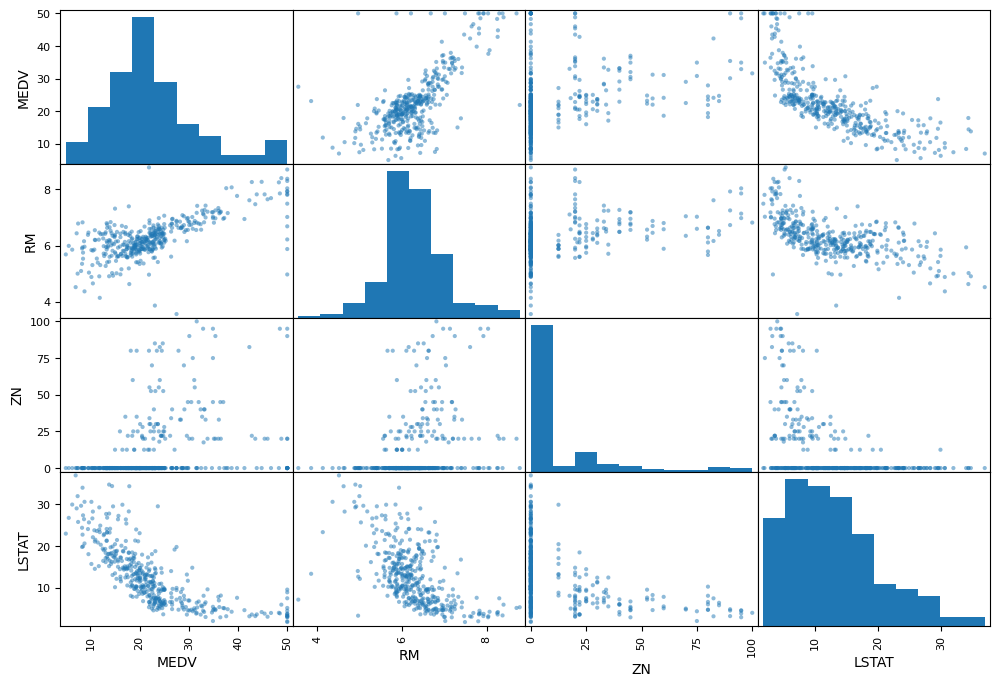

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

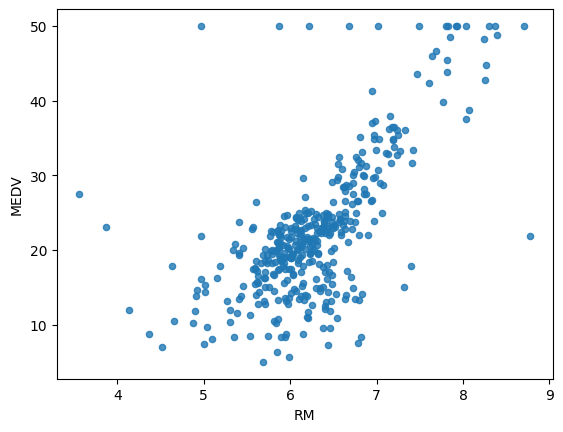

In [23]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [24]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

<Axes: xlabel='MEDV', ylabel='TAXRM'>

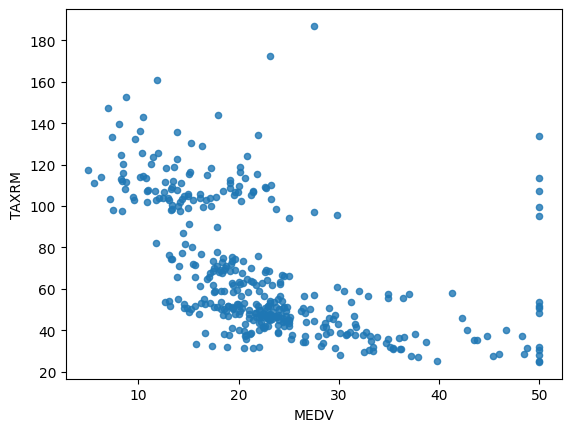

In [25]:
housing.plot(kind = "scatter",x = "MEDV",y = "TAXRM",alpha = 0.8)

# Dealing With Missing Values

In [26]:
median = housing.median()
housing.fillna(median)
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284629,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.572841
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714608,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.590813
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.795445
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.867403
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [27]:
housing["RM"].shape

(404,)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)
X = imputer.transform(housing)

In [29]:
housing.describe()  #see housing is still missing the value of rm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284629,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.572841
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714608,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.590813
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.795445
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.867403
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [30]:
# make new data frame which will have all values , note that housing is still missing the values

In [31]:
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()      #note that all values of RM are present now

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283718,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.403219
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710208,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.430865
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.961287
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.867403
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


# Spliting Housing train data into features and labels

In [32]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# creating pipline

pipline helps to chain multiple data processing and moduling steps together into a single reusable object.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

mypipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [34]:
housing_num_tr = mypipeline.fit_transform(housing)

In [35]:
housing_num_tr  #this is numpy array imputed and scaled 

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting desired model for predictions

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model2 = DecisionTreeRegressor()
model1 = LinearRegression()
model3 = RandomForestRegressor()
model1.fit(housing_num_tr,housing_labels)

LinearRegression()

In [74]:
model2.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [75]:
model3.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [48]:
prepared_data = mypipeline.transform(some_data)


In [50]:
model1.predict(prepared_data)

array([23.94416556, 27.21803556, 20.5801235 , 25.05467203, 23.76886197])

In [51]:
model2.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [40]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

# Evaluating Model with RMSE

In [41]:
# if our linear regression model works good rmse will be less. but we can take another model and compair with linera reg model

In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = model1.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [57]:
lin_mse  #heavy error 

23.24345765040072

In [58]:
housing_predictions = model2.predict(housing_num_tr)
tree_mse = mean_squared_error(housing_labels,housing_predictions)

In [59]:
tree_mse  #over fitting .... not good

0.0

# Better Evaluation techneque : Cross Validation method

In [60]:
# what we do is we divide data into k parts . then we train on n-1 groups and test on 1  for all groups. then we get list of errors , wee can remove mean and all

## cross validation on model 2

In [69]:
from sklearn.model_selection import cross_val_score
score2 = cross_val_score(model2,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmsc_score2 = np.sqrt(-score2)

In [70]:
rmsc_score2

array([3.81495772, 5.48830242, 5.47965194, 4.05838488, 4.04688152,
       2.86247271, 6.51703537, 3.75499667, 3.54076263, 3.82488562])

## cross validation on model 1

In [68]:
score1 = cross_val_score(model1,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmsc_score1 = np.sqrt(-score1)

In [71]:
rmsc_score1

array([4.22478531, 4.27171879, 5.10824086, 3.85222833, 5.34214203,
       4.39893236, 7.46286157, 5.44381126, 4.05448931, 6.05957316])

# cross validation on model 3

In [76]:
score3 = cross_val_score(model3,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmsc_score3 = np.sqrt(-score3)
rmsc_score3

array([2.82352388, 2.74812784, 4.6129278 , 2.62388738, 3.47539674,
       2.67154119, 4.64521474, 3.37949448, 2.99658466, 3.24660206])

In [78]:
def print_info(scores):
    print("Scores:",scores)
    print("Mean :",scores.mean())
    print("Standard Deveation: ",scores.std())

In [79]:
print_info(rmsc_score1)

Scores: [4.22478531 4.27171879 5.10824086 3.85222833 5.34214203 4.39893236
 7.46286157 5.44381126 4.05448931 6.05957316]
Mean : 5.021878300102953
Standard Deveation:  1.0589308482604542


In [80]:
print_info(rmsc_score2)

Scores: [3.81495772 5.48830242 5.47965194 4.05838488 4.04688152 2.86247271
 6.51703537 3.75499667 3.54076263 3.82488562]
Mean : 4.338833146734705
Standard Deveation:  1.0595852147115112


In [81]:
print_info(rmsc_score3)

Scores: [2.82352388 2.74812784 4.6129278  2.62388738 3.47539674 2.67154119
 4.64521474 3.37949448 2.99658466 3.24660206]
Mean : 3.322330075970169
Standard Deveation:  0.7102163402102288


# Dump and lode model

In [82]:
from joblib import dump,load
dump(model3,'Dragon.joblib')

['Dragon.joblib']

# Testing module on Test set

In [89]:
x_test = strat_test_set.drop("MEDV",axis=1)
x_text_labels = strat_test_set["MEDV"].copy()
x_test_prepare = mypipeline.transform(x_test)
final_predictions = model3.predict(x_test_prepare)
final_mse = mean_squared_error(x_text_labels,final_predictions)
final_rmse = np.sqrt(final_mse)

In [91]:
final_rmse   # very nice 

2.956349396621102

# final predications comparison with labels 

In [97]:
print(final_predictions[:5])
print(list(x_text_labels[:5]))

[24.411 11.793 25.702 22.334 18.477]
[16.5, 10.2, 30.1, 23.0, 14.4]
